# COVID-19 Hotspot Prediction

Binary Classifier


## Data Descriptions















In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree

In [ ]:
#read csv into dataframe
df = pd.read_csv('County_Hotspot_Data.csv')
df
#2722 rows and 17 columns

,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot
0,Alameda,311,62.2,5736,819,92.40%,13289.5,10915156,1559308,38.0,362089,0.388439,0.106649,0.007568,0.311317,0.008079,0.114477,No Threat
1,Butte,1,0.2,2120,303,99.90%,924.7,1551046,221578,36.9,362089,0.801899,0.018176,0.010644,0.047289,0.003641,0.055989,No Threat
2,Calaveras,0,0.0,250,36,100.00%,303.1,314447,44921,52.0,239750,0.854993,0.018039,0.012274,0.038999,0.000894,0.039882,No Threat
3,Colusa,0,0.0,400,57,100.00%,129.5,149968,21424,36.4,239750,0.736003,0.024059,0.005917,0.083866,0.001967,0.106023,No Threat
4,Contra Costa,100,20.0,5594,799,97.50%,9416.4,7568624,1081232,40.0,239750,0.520561,0.088069,0.005083,0.178033,0.004009,0.140747,No Threat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,Tulare,173,34.6,4683,669,94.80%,652.4,3157756,451108,31.4,188524,0.675142,0.014610,0.015236,0.034852,0.001849,0.212808,No Threat
2718,Tuolumne,18,3.6,588,84,95.70%,167.3,380429,54347,34.0,161672,0.854993,0.018039,0.012274,0.038999,0.000894,0.039882,No Threat
2719,Ventura,366,73.2,8131,1162,93.70%,2649.5,5850530,835790,39.0,161672,0.801618,0.018333,0.006791,0.075328,0.001346,0.050919,No Threat
2720,Yolo,91,18.2,850,121,85.00%,1396.5,1429134,204162,31.8,282051,0.716912,0.028082,0.009995,0.145937,0.004866,0.041896,No Threat


## Descriptive Stats

In [ ]:
#inspect df
df.info()
#columns contain dtypes: int, float, and objects
df.isnull().sum()
#no null values
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   county                                2722 non-null   object 
 1   Sum of Reported Cases                 2722 non-null   int64  
 2   Critical_Cases_(Requiring_Bed)        2722 non-null   float64
 3   Sum of all_hospital_beds              2722 non-null   int64  
 4   Beds_per_day                          2722 non-null   int64  
 5   Percent_Beds_Avail                    2722 non-null   object 
 6   Sum of Pop_density                    2722 non-null   float64
 7   Sum of Population                     2722 non-null   int64  
 8   Total_Population                      2722 non-null   int64  
 9   Average of Median_age                 2722 non-null   float64
 10  Sum of Per Capita Income              2722 non-null   int64  
 11  Average of White 

,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot
0,Alameda,311,62.2,5736,819,92.40%,13289.5,10915156,1559308,38.0,362089,0.388439,0.106649,0.007568,0.311317,0.008079,0.114477,No Threat
1,Butte,1,0.2,2120,303,99.90%,924.7,1551046,221578,36.9,362089,0.801899,0.018176,0.010644,0.047289,0.003641,0.055989,No Threat
2,Calaveras,0,0.0,250,36,100.00%,303.1,314447,44921,52.0,239750,0.854993,0.018039,0.012274,0.038999,0.000894,0.039882,No Threat
3,Colusa,0,0.0,400,57,100.00%,129.5,149968,21424,36.4,239750,0.736003,0.024059,0.005917,0.083866,0.001967,0.106023,No Threat
4,Contra Costa,100,20.0,5594,799,97.50%,9416.4,7568624,1081232,40.0,239750,0.520561,0.088069,0.005083,0.178033,0.004009,0.140747,No Threat


# Exploratory Data Analysis

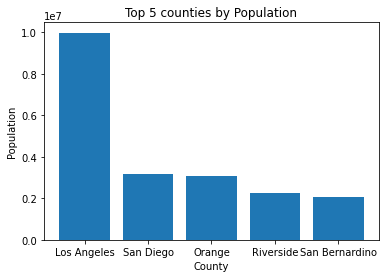

In [ ]:
# Most populated counties

county_population = df.groupby('county')['Total_Population'].mean()
county_population = county_population.sort_values(ascending=False)
county_population_head = county_population.head()
county_population_tail = county_population.tail()
plt.bar(county_population_head.index, county_population_head)
plt.xticks(rotation=0)
plt.title('Top 5 counties by Population')
plt.xlabel('County')
plt.ylabel('Population')
plt.savefig('top_five.png')
plt.show()

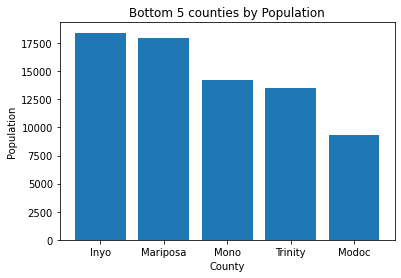

In [ ]:
# Least populatied counties
county_population = df.groupby('county')['Total_Population'].mean()
county_population = county_population.sort_values(ascending=False)

county_population_tail = county_population.tail()
plt.bar(county_population_tail.index, county_population_tail)
plt.xticks(rotation=0)
plt.title('Bottom 5 counties by Population')
plt.xlabel('County')
plt.ylabel('Population')
plt.savefig('Least_populated.png')
plt.show()

In [ ]:
# Descriptive Stats Info
df_avg = df.mean()
avg_white = df['Average of White % of Pop'].mean()
avg_black = df['Average of Black %. Of Pop'].mean()
avg_indian = df['Average of Indian Native % of Pop'].mean()
avg_asian = df['Average of Asian % of Pop'].mean()
avg_hawaiian = df['Average of Hawaiian Pacific Islander'].mean()

print('white population:    ',avg_white*100)
print('black population:    ',avg_black*100)
print('indian population:   ',avg_indian*100)
print('asian population:    ',avg_asian*100)
print('hawaiian population: ',avg_hawaiian*100)

white population:     72.6581103769292
black population:     3.128904779537088
indian population:    1.1877131873254907
asian population:     8.817466282108805
hawaiian population:  0.3136026935341694


In [ ]:
# Number of Unique Counties
len(df.county.unique())

56

In [ ]:
# Average age 
df['Average of Median_age'].mean()

39.097538574577236

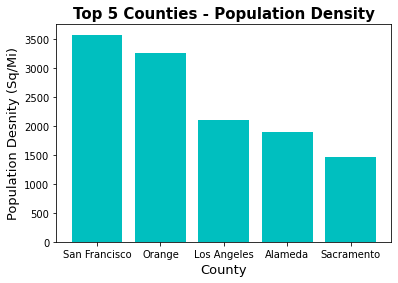

In [ ]:
# Smallest populatied counties
county_pop_density = df.groupby('county')['Sum of Pop_density'].mean()
county_pop_density = county_pop_density.sort_values(ascending=False)
county_pop_density = county_pop_density/7

county_pop_density = county_pop_density.head()
plt.bar(county_pop_density.index, county_pop_density, color='c')
plt.xticks(rotation=0)
plt.title('Top 5 Counties - Population Density', fontweight="bold",fontsize=15)
plt.xlabel('County',fontsize=13)
plt.ylabel('Population Desnity (Sq/Mi)',fontsize=13)
plt.savefig('Pop_Dens.png')
plt.show()

# Model Creation

# Logistic Regression Model

In [ ]:
#Create Random Sample to account for Class Imbalance Issue
y = (df.Hotspot == 'Hotspot').astype(int)
df['Hotspot_dummy'] = y
df.Hotspot_dummy.value_counts()

#create test set (30% of data) and training set (70% of data)
from sklearn.model_selection import train_test_split
df_logit = df

df_logit_x = df_logit[df_logit['Hotspot_dummy'] == 0]

df_logit_x = df_logit_x.sample(710)

df_logit_x

df_logit_y = df

df_logit_y = df_logit[df_logit['Hotspot_dummy'] == 1]

df_logit_y



df_logit_regression = pd.concat([df_logit_x, df_logit_y])

df_logit_regression


,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot,Hotspot_dummy
2404,Madera,221,44.2,1941,277,84.10%,495.6,1067164,152452,34.7,252308,0.680576,0.026302,0.011505,0.024395,0.007189,0.225664,No Threat,0
500,El Dorado,29,5.8,1645,235,97.50%,711.2,1270255,181465,45.9,364147,0.866046,0.008525,0.013171,0.052447,0.000648,0.025124,No Threat,0
1245,Sacramento,972,194.4,17353,2479,92.20%,10213.0,10151939,1450277,36.6,212681,0.553688,0.095898,0.007090,0.161615,0.012340,0.089381,No Threat,0
1430,Tuolumne,8,1.6,588,84,98.10%,167.3,380429,54347,34.0,161672,0.854993,0.018039,0.012274,0.038999,0.000894,0.039882,No Threat,0
1294,Napa,71,14.2,2020,289,95.10%,1236.2,974771,139253,41.6,334103,0.736003,0.024059,0.005917,0.083866,0.001967,0.106023,No Threat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,Kings,150,30.0,828,118,74.60%,761.6,1059730,151390,31.8,171668,0.752766,0.056460,0.018334,0.033373,0.003008,0.090493,Hotspot,1
2634,Mono,49,9.8,119,17,42.40%,31.5,99351,14193,37.7,172928,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,1
2647,San Joaquin,1182,236.4,6224,889,73.40%,3439.8,4907350,701050,34.7,525588,0.565985,0.068875,0.006339,0.161504,0.006926,0.073180,Hotspot,1
2658,Sutter,66,13.2,98,14,5.70%,1093.4,665469,95067,36.2,186802,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,1


In [ ]:
#split data into X and y variables based on newly encoded Hotspot_Dummy
y = df_logit_regression['Hotspot_dummy']
X = df_logit_regression[['Sum of Pop_density', 'Total_Population', 'Average of Median_age', 'Sum of Per Capita Income', 'Average of White % of Pop', 'Average of Black %. Of Pop', 'Average of Indian Native % of Pop', 'Average of Asian % of Pop', 'Average of Hawaiian Pacific Islander', 'Average of Other Race % of Pop']]

In [ ]:
#create test set (30% of data) and training set (70% of data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7)
y.to_numpy() #transform series into array

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Train model using Logistic Regression Classifier
clf = linear_model.LogisticRegression(C=1.0, solver='liblinear', random_state=99)
model2 = clf.fit(X_train, Y_train)
#make prediction
y_pred2 = clf.predict(X_test)

In [ ]:
#Accuracy 
print(metrics.accuracy_score(Y_test, y_pred2))

#Precision
print(metrics.precision_score(Y_test, y_pred2, pos_label=1))

#Recall
print(metrics.recall_score(Y_test, y_pred2, pos_label=1))

#F1 Score
print(metrics.f1_score(Y_test, y_pred2, pos_label=1))

#Classification Report
print(classification_report(Y_test, y_pred2))


0.5023474178403756
0.47796610169491527
0.7085427135678392
0.5708502024291497
              precision    recall  f1-score   support

           0       0.56      0.32      0.41       227
           1       0.48      0.71      0.57       199

    accuracy                           0.50       426
   macro avg       0.52      0.52      0.49       426
weighted avg       0.52      0.50      0.48       426



In [ ]:
# Retrieving coefficients
# The higher the coefficient, the larger the influence of its corresponding feature on the outcome
clf.coef_

# Storing coefficients in dictionary with feature names
coef_dict = {}
for coef, feat in zip(clf.coef_[0,:],X):
    coef_dict[feat] = coef

# storing result in DataFrame including signs to show positive or negative influence
coef = pd.DataFrame.from_dict(coef_dict,orient='index', columns=['coefficient'])
coef
abs(coef).sort_values(by='coefficient', ascending=False)

,coefficient
Average of Median_age,2.575637e-04
Sum of Pop_density,5.278186e-05
Average of Other Race % of Pop,1.366304e-05
Average of White % of Pop,7.978913e-06
Average of Asian % of Pop,6.943503e-06
Average of Black %. Of Pop,2.793580e-06
Average of Indian Native % of Pop,5.097479e-07
Total_Population,1.373572e-07
Sum of Per Capita Income,9.182764e-08
Average of Hawaiian Pacific Islander,2.680383e-08


# Decision Tree Model



In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt


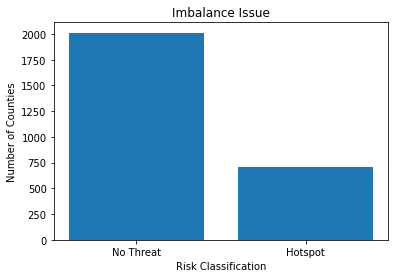

In [ ]:
# Creating Dummy for Hotspot (1,0)
y = (df.Hotspot == 'Hotspot').astype(int)

# Visualizing Number of Hotspots in Dataset
df['Hotspot_dummy'] = y
df.Hotspot_dummy.value_counts().index
plt.bar(df.Hotspot.value_counts().index,df.Hotspot_dummy.value_counts())
plt.xlabel('Risk Classification')
plt.ylabel('Number of Counties')
plt.title('Imbalance Issue')
plt.savefig('imbalanced.png')  
plt.show()

In [ ]:
# Eliminating Class Imbalance Problem

df_tree = df
df_tree_x = df_tree[df_tree['Hotspot_dummy'] == 0]
df_tree_x = df_tree_x.sample(710)
df_tree_x

df_tree_y = df
df_tree_y = df_tree[df_tree['Hotspot_dummy'] == 1]
df_tree_y

df_decision_tree = pd.concat([df_tree_x, df_tree_y])
df_decision_tree

,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot,Hotspot_dummy
2469,Nevada,73,14.6,851,122,88.00%,709.1,690242,98606,50.0,334103,0.930600,0.003108,0.004882,0.012461,0.003428,0.003148,No Threat,0
285,Lassen,4,0.8,175,25,96.80%,49.7,233492,33356,36.6,196392,0.716912,0.028082,0.009995,0.145937,0.004866,0.041896,No Threat,0
1380,Butte,50,10.0,3157,451,97.80%,924.7,1551046,221578,36.9,362089,0.801899,0.018176,0.010644,0.047289,0.003641,0.055989,No Threat,0
278,Glenn,4,0.8,235,34,97.60%,147.7,196133,28019,36.4,176820,0.866046,0.008525,0.013171,0.052447,0.000648,0.025124,No Threat,0
1245,Sacramento,972,194.4,17353,2479,92.20%,10213.0,10151939,1450277,36.6,212681,0.553688,0.095898,0.007090,0.161615,0.012340,0.089381,No Threat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,Kings,150,30.0,828,118,74.60%,761.6,1059730,151390,31.8,171668,0.752766,0.056460,0.018334,0.033373,0.003008,0.090493,Hotspot,1
2634,Mono,49,9.8,119,17,42.40%,31.5,99351,14193,37.7,172928,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,1
2647,San Joaquin,1182,236.4,6224,889,73.40%,3439.8,4907350,701050,34.7,525588,0.565985,0.068875,0.006339,0.161504,0.006926,0.073180,Hotspot,1
2658,Sutter,66,13.2,98,14,5.70%,1093.4,665469,95067,36.2,186802,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,1


In [ ]:
# Split Data set in x and y
# split data into X and y variables

X = df_decision_tree[['Sum of Pop_density', 'Average of Median_age', 'Sum of Per Capita Income', 'Average of White % of Pop', 'Average of Black %. Of Pop', 'Average of Indian Native % of Pop', 'Average of Asian % of Pop', 'Average of Hawaiian Pacific Islander', 'Average of Other Race % of Pop']]
y = df_decision_tree['Hotspot_dummy']
X

,Sum of Pop_density,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop
2469,709.1,50.0,334103,0.930600,0.003108,0.004882,0.012461,0.003428,0.003148
285,49.7,36.6,196392,0.716912,0.028082,0.009995,0.145937,0.004866,0.041896
1380,924.7,36.9,362089,0.801899,0.018176,0.010644,0.047289,0.003641,0.055989
278,147.7,36.4,176820,0.866046,0.008525,0.013171,0.052447,0.000648,0.025124
1245,10213.0,36.6,212681,0.553688,0.095898,0.007090,0.161615,0.012340,0.089381
...,...,...,...,...,...,...,...,...,...
2624,761.6,31.8,171668,0.752766,0.056460,0.018334,0.033373,0.003008,0.090493
2634,31.5,37.7,172928,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407
2647,3439.8,34.7,525588,0.565985,0.068875,0.006339,0.161504,0.006926,0.073180
2658,1093.4,36.2,186802,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407


In [ ]:
# Create Test and Train Datas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7)

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                               ('pca', pca),
                               ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]


parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dec_tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                             

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 8
Best Number Of Components: 8

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Decision Tree Model with GridSearch Inputs:
# Decision Tree Regressor Model
tree_model =  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
tree_model.fit(X_test, Y_test)
y_pred = tree_model.predict(X_test)
# tree.plot_tree(tree_model)


In [ ]:
# Performance Metrics with Grid Search
#Evaluate Model Performance
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))



              precision    recall  f1-score   support

           0       0.67      0.71      0.69       209
           1       0.71      0.67      0.69       217

    accuracy                           0.69       426
   macro avg       0.69      0.69      0.69       426
weighted avg       0.69      0.69      0.69       426



In [ ]:
# Perfromance Scores
print('Decision Tree Performance:')
print()
#Accuracy 
print('Accuracy:  ', metrics.accuracy_score(Y_test, y_pred))

#Precision
print('Precision: ',metrics.precision_score(Y_test, y_pred))

#Recall
print('Recall:    ',metrics.recall_score(Y_test, y_pred))

#F1 Score
print('F1 Score:  ', metrics.f1_score(Y_test, y_pred))



Decision Tree Performance:

Accuracy:   0.6901408450704225
Precision:  0.7073170731707317
Recall:     0.6682027649769585
F1 Score:   0.6872037914691944


In [ ]:
# Exporting Decision Tree
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

tree.export_graphviz(tree_model)

dot_data = tree.export_graphviz(tree_model, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.render("6070_final_dec_tree")


'6070_final_dec_tree.pdf'

In [ ]:
importance = tree_model.feature_importances_
feature_names = ['Sum of Pop_density', 'Average of Median_age', 'Sum of Per Capita Income', 'Average of White % of Pop', 'Average of Black %. Of Pop', 'Average of Indian Native % of Pop', 'Average of Asian % of Pop', 'Average of Hawaiian Pacific Islander', 'Average of Other Race % of Pop']
table = pd.DataFrame(index = [feature_names], columns = ['Feature Importance'])

In [ ]:
count = 0
for x in importance:
  table.iloc[count, 0] = x
  count = count +1

table

,Feature Importance
Sum of Pop_density,0.0341295
Average of Median_age,0.570267
Sum of Per Capita Income,0.0581927
Average of White % of Pop,0.0512382
Average of Black %. Of Pop,0
Average of Indian Native % of Pop,0.116041
Average of Asian % of Pop,0.145357
Average of Hawaiian Pacific Islander,0.0174512
Average of Other Race % of Pop,0.00732321


<BarContainer object of 9 artists>

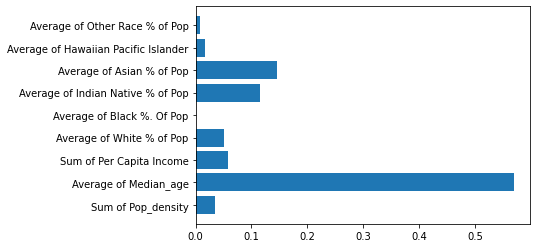

In [ ]:
plt.barh(feature_names, tree_model.feature_importances_)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   county                                2722 non-null   object 
 1   Sum of Reported Cases                 2722 non-null   int64  
 2   Critical_Cases_(Requiring_Bed)        2722 non-null   float64
 3   Sum of all_hospital_beds              2722 non-null   int64  
 4   Beds_per_day                          2722 non-null   int64  
 5   Percent_Beds_Avail                    2722 non-null   object 
 6   Sum of Pop_density                    2722 non-null   float64
 7   Sum of Population                     2722 non-null   int64  
 8   Total_Population                      2722 non-null   int64  
 9   Average of Median_age                 2722 non-null   float64
 10  Sum of Per Capita Income              2722 non-null   int64  
 11  Average of White 

# Decision Tree Prediciton

In [ ]:
# User Input Parameters:
#.   'Sum of Pop_density','Average of Median_age', 'Sum of Per Capita Income', 'Average of White % of Pop', 
#   'Average of Black %. Of Pop', 'Average of Indian Native % of Pop', 'Average of Asian % of Pop', 'Average of Hawaiian Pacific Islander', 'Average of Other Race % of Pop'

user_input = [[2170.7, 47.3, 172088, 0.788595, 0.027269, 0.005927, 0.064379, 0.001055, 0.071724]]

#Prediciton
y_pred_test= tree_model.predict(user_input)
print(y_pred_test)

print('This county is predicted to be:')
if y_pred_test == 0:
  print('No threat')
elif y_pred_test == 1:
  print('Hotspot')

[0]
This county is predicted to be:
No threat


# KNN Model

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('County_Hotspot_Data.csv')

df.head()

,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot
0,Alameda,311,62.2,5736,819,92.40%,13289.5,10915156,1559308,38.0,362089,0.388439,0.106649,0.007568,0.311317,0.008079,0.114477,No Threat
1,Butte,1,0.2,2120,303,99.90%,924.7,1551046,221578,36.9,362089,0.801899,0.018176,0.010644,0.047289,0.003641,0.055989,No Threat
2,Calaveras,0,0.0,250,36,100.00%,303.1,314447,44921,52.0,239750,0.854993,0.018039,0.012274,0.038999,0.000894,0.039882,No Threat
3,Colusa,0,0.0,400,57,100.00%,129.5,149968,21424,36.4,239750,0.736003,0.024059,0.005917,0.083866,0.001967,0.106023,No Threat
4,Contra Costa,100,20.0,5594,799,97.50%,9416.4,7568624,1081232,40.0,239750,0.520561,0.088069,0.005083,0.178033,0.004009,0.140747,No Threat


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hotspot_encoded=le.fit_transform(df.Hotspot)
print(hotspot_encoded)
#add to dataframe
df['Hotspot_encoded'] = hotspot_encoded

[1 1 1 ... 1 1 1]


In [ ]:
df_x = df[df['Hotspot_encoded'] == 1]
df_x = df_x.sample(710)
df_x

df_y = df[df['Hotspot_encoded'] == 0]
df_y

df_final = pd.concat([df_x, df_y])
df_final

,county,Sum of Reported Cases,Critical_Cases_(Requiring_Bed),Sum of all_hospital_beds,Beds_per_day,Percent_Beds_Avail,Sum of Pop_density,Sum of Population,Total_Population,Average of Median_age,Sum of Per Capita Income,Average of White % of Pop,Average of Black %. Of Pop,Average of Indian Native % of Pop,Average of Asian % of Pop,Average of Hawaiian Pacific Islander,Average of Other Race % of Pop,Hotspot,Hotspot_encoded
838,Humboldt,45,9.0,1830,261,96.60%,233.1,944132,134876,38.4,176820,0.787397,0.015189,0.052177,0.026004,0.003976,0.036191,No Threat,1
869,Santa Clara,1334,266.8,21982,3140,91.50%,9885.4,12890983,1841569,37.4,271635,0.451397,0.025577,0.004465,0.376954,0.003674,0.084597,No Threat,1
2661,Tulare,212,42.4,4641,663,93.60%,652.4,3157756,451108,31.4,188524,0.675142,0.014610,0.015236,0.034852,0.001849,0.212808,No Threat,1
381,Alameda,395,79.0,20776,2968,97.30%,13289.5,10915156,1559308,38.0,362089,0.388439,0.106649,0.007568,0.311317,0.008079,0.114477,No Threat,1
2373,Shasta,152,30.4,3969,567,94.60%,324.8,1249640,178520,41.0,326998,0.860101,0.010429,0.022362,0.035073,0.003054,0.022951,No Threat,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,Kings,150,30.0,828,118,74.60%,761.6,1059730,151390,31.8,171668,0.752766,0.056460,0.018334,0.033373,0.003008,0.090493,Hotspot,0
2634,Mono,49,9.8,119,17,42.40%,31.5,99351,14193,37.7,172928,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,0
2647,San Joaquin,1182,236.4,6224,889,73.40%,3439.8,4907350,701050,34.7,525588,0.565985,0.068875,0.006339,0.161504,0.006926,0.073180,Hotspot,0
2658,Sutter,66,13.2,98,14,5.70%,1093.4,665469,95067,36.2,186802,0.680007,0.018490,0.009343,0.164534,0.001897,0.050407,Hotspot,0


In [ ]:
# training data
features_list = ['Sum of Pop_density',	'Sum of Population',	'Average of Median_age',	'Sum of Per Capita Income',	'Average of White % of Pop', 'Average of Black %. Of Pop', 'Average of Indian Native % of Pop',	'Average of Asian % of Pop',	'Average of Hawaiian Pacific Islander', 'Average of Other Race % of Pop']
X = df_final[features_list]
y = df_final['Hotspot_encoded']

In [ ]:
#create test set (30% of data) and training set (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7)

In [ ]:
#grid search to tune model
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 25],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_kn.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)
print(y_pred)

[1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0]


In [ ]:
#Evaluate Model Performance
from sklearn import metrics
from sklearn.metrics import classification_report

#Accuracy 
print(metrics.accuracy_score(y_test, y_pred))

#Precision
print(metrics.precision_score(y_test, y_pred))

#Recall
print(metrics.recall_score(y_test, y_pred))

#F1 Score
print(metrics.f1_score(y_test, y_pred))

#ROC Curve
print(classification_report(y_test, y_pred))

#1 = No Threat
#0 = Hotspot

0.5234741784037559
0.5
0.6009852216748769
0.5458612975391499
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       223
           1       0.50      0.60      0.55       203

    accuracy                           0.52       426
   macro avg       0.53      0.53      0.52       426
weighted avg       0.53      0.52      0.52       426



In [ ]:
from sklearn.model_selection import RandomizedSearchCV


#random search to tune model
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
rand_kn = RandomizedSearchCV(estimator = kn,
                        param_distributions = params,
                        scoring = 'accuracy')
rand_kn.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 25],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
print(rand_kn.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
model2 = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')

# Train the model using the training sets
model2.fit(X_train,y_train)

#Predict Output
y_pred2= model2.predict(X_test)
print(y_pred2)

[1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0]


In [ ]:
#Evaluate Model Performance
from sklearn import metrics
from sklearn.metrics import classification_report

#Accuracy 
print(metrics.accuracy_score(y_test, y_pred2))

#Precision
print(metrics.precision_score(y_test, y_pred2))

#Recall
print(metrics.recall_score(y_test, y_pred2))

#F1 Score
print(metrics.f1_score(y_test, y_pred2))

#ROC Curve
print(classification_report(y_test, y_pred2))

0.5234741784037559
0.5
0.6009852216748769
0.5458612975391499
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       223
           1       0.50      0.60      0.55       203

    accuracy                           0.52       426
   macro avg       0.53      0.53      0.52       426
weighted avg       0.53      0.52      0.52       426



# Descriptive Stats
